# Método de newton para raízes de função

## Importar as biblioteas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import plot
import matplotlib.pyplot as plt
import numpy as np

## Definir a função do método de newton:

In [2]:
dx = 1e-10

def newton(f,fp,x) :
    return x-(f(x)/fp(x))

def derivApprox(f,x) :
    return (f(x+dx)-f(x))/dx

## Definir a função

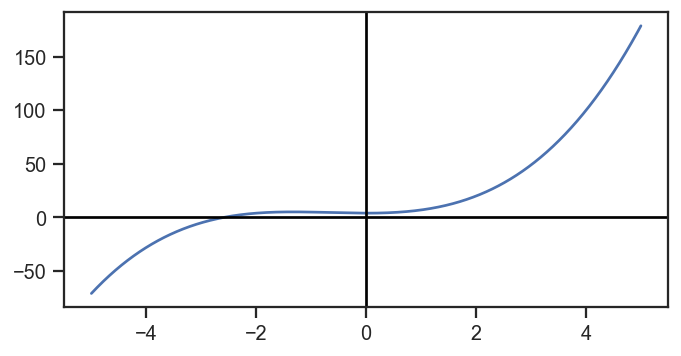

In [3]:
f = lambda x : x**3+2*x**2+4
fp = lambda x : 3*x**2+4*x

leftlimit = -5
rightlimit = 5

xarr = np.linspace(leftlimit,rightlimit,1000)
yarr = f(xarr)
plot.plot(xarr,yarr)

## Definir limites

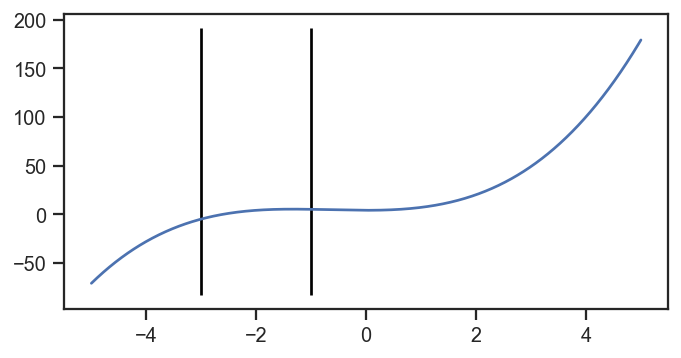

In [4]:
a = -3
b = -1
e = 1e-7 #function value considered as 0

plot.plotrange(xarr,yarr,a,b)

## Visualização das linhas tangentes

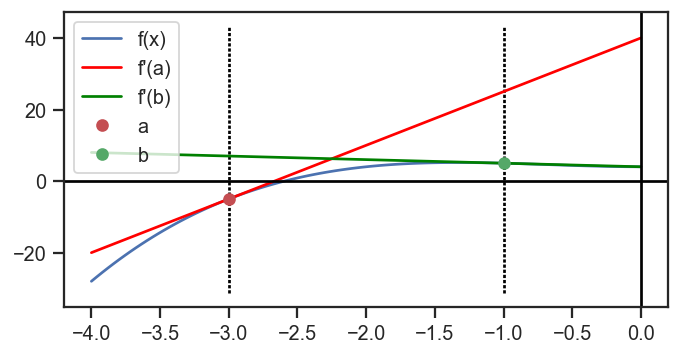

In [5]:
rxarr = np.linspace(a-1,b+1,100)

plt.figure(figsize=(6, 3), dpi=130)

plt.plot(rxarr, f(rxarr), label="f(x)")

# Line tangent to f(a)
ma = fp(a)
ba = -ma*a+f(a)
la = lambda x : ma*x + ba
plt.plot(rxarr, la(rxarr),'red', label="f'(a)")

# Line tangent to f(b)
mb = fp(b)
bb = -b*b+f(b)
lb = lambda x : mb*x + bb
plt.plot(rxarr, lb(rxarr),'green', label="f'(b)")

plt.plot(a,f(a),'ro', label="a")
plt.plot(b,f(b),'go', label="b")

ax = plt.gca()
ylim = ax.get_ylim()

plt.vlines(a, ylim[0], ylim[1], color='black', linestyle = (0,(1.2,0.7)))
plt.vlines(b, ylim[0], ylim[1], color='black', linestyle = (0,(1.2,0.7)))

plt.axhline(0, color='black')
if a-1<=0 and b+1>=0 : plt.axvline(0, color='black')
    
plt.legend(loc="upper left")

plt.show()

## Algoritmo de bisseção

f'(x) tem sinal diferente de f''(x)
A raiz aproximada é: -2.594313016369433 (-0.0000000001431335)


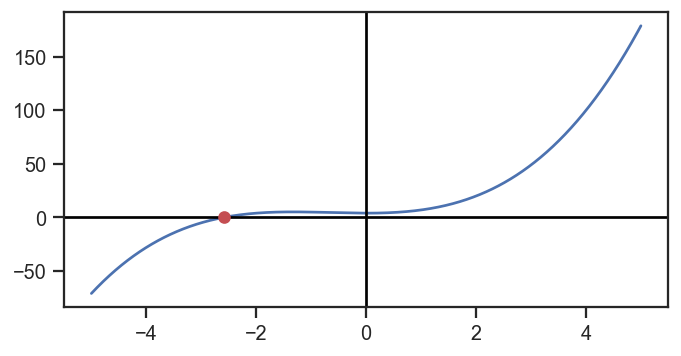

0 -2.6666666666666665 -0.7407407407407369
1 -2.5972222222222223 -0.028600287208506714
2 -2.5943179913768146 -4.882564558528202e-05
3 -2.594313016369433 -1.4313350504835398e-10


In [6]:
xm = (a+b)/2
if fp(xm)*derivApprox(fp,xm)>0 :
    print("f'(x) tem o mesmo sinal de f''(x)")
    x = b
else :
    print("f'(x) tem sinal diferente de f''(x)")
    x = a
x = newton(f,fp,x)
n = 0
r = [[x,n]]
while abs(f(x)) > e :
    x = newton(f,fp,x)
    n+=1
    r.append([x, n])
    
print("A raiz aproximada é: {} ({:.16f})".format(x,f(x)))
plot.plotdot(xarr, yarr, [(x,0)])

for x in r :
    print(x[1], x[0], f(x[0]))